<a href="https://colab.research.google.com/github/pjcroxas/Data-Analytics-Case-Studies/blob/main/BCGx_Analyzing_Oil_Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Virtual Internship/Boston Consulting Groups/Datasets"

client_df = pd.read_csv(dir+"/client_data.csv")
price_df = pd.read_csv(dir+"/price_data.csv")

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
client_df.sample(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
4658,fd15bbcb2f1c2e6a7549fa4650bafaf5,MISSING,2539,0,0,2009-12-21,2016-12-21,2015-11-01,2015-12-23,379.62,...,f,0.00,20.54,20.54,1,31.71,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.392,0
5126,349743a3c2830e08c6cfedf9ba61a2bf,foosdfpfkusacimwkcsosbicdxkicaua,1021907,0,81400,2011-02-05,2016-02-05,2011-02-05,2015-02-09,4182.58,...,f,448.05,49.44,49.44,1,478.70,5,lxidpiddsbxsbosboudacockeimpuepw,33.000,0
3747,f732f7aa5363755f894f65ba3b6e03b8,foosdfpfkusacimwkcsosbicdxkicaua,4066,0,0,2011-12-02,2016-12-02,2015-11-01,2015-12-03,611.80,...,f,0.00,26.04,26.04,1,64.04,4,lxidpiddsbxsbosboudacockeimpuepw,10.390,1


In [10]:
price_df.sample(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
187913,57ecd499c1c292d5fa21ef3a8439faea,2015-12-01,0.119405,0.101259,0.073433,40.565973,24.339578,16.226383
171200,21b4ee86e4449910741395b18e002de7,2015-04-01,0.153048,0.000000,0.000000,44.444710,0.000000,0.000000
66184,b3fe086fce17cf895a5d51d06cdc5ae9,2015-10-01,0.163071,0.084016,0.000000,44.266930,0.000000,0.000000


In [12]:
print("Client Data: ", client_df.shape)
print("Price Data: ", price_df.shape)

Client Data:  (14606, 26)
Price Data:  (193002, 8)


# 💡**Exploratory Data Analysis**

In [14]:
# Descriptive Statistics
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [59]:
def convert_churn(feature):
  if feature == 1:
    return "Churn"
  else:
    return "Retention"

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

client_df["Churn Status"] = client_df["churn"].apply(convert_churn)

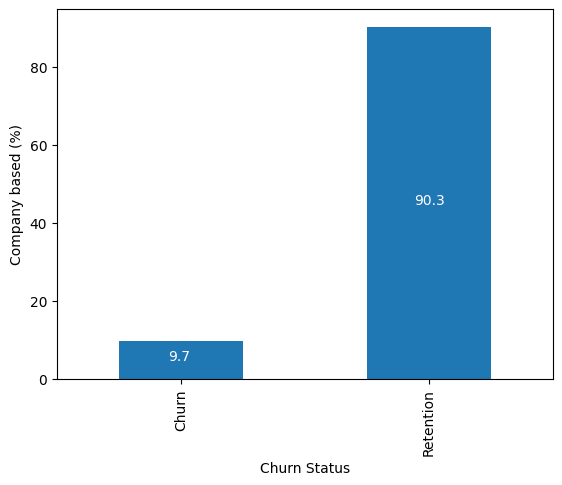

In [61]:
by_churn = client_df.groupby(["Churn Status"]).agg({"id": "count"}).reset_index()
by_churn["churn_pct"] = (by_churn["id"] / by_churn["id"].sum()) * 100
by_churn = by_churn.set_index("Churn Status")
ax = by_churn["churn_pct"].plot.bar(stacked=True)
plt.ylabel("Company based (%)")
annotate_stacked_bars(ax, textsize=10)

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

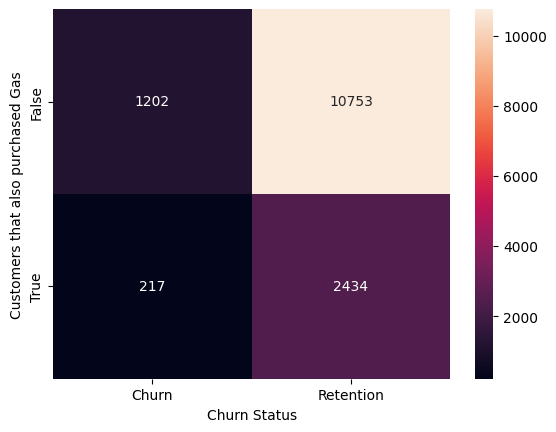

In [184]:
client_gas = client_df.groupby(["has_gas", "Churn Status"]).count()["id"].reset_index()
client_gas_pivot = client_gas.pivot(index= "has_gas",
                                     columns= "Churn Status",
                                     values="id"
                                    )

ax = sns.heatmap(client_gas_pivot, annot=True, fmt=".0f")
plt.ylabel("Customers that also purchased Gas")
ax.set_yticklabels(["False", True])

## **Sales Channel**

**Sales Channel** is the way in which a business-to-business (B2B) sales organization goes to market, either through direct or indirect routes, to sell its product or solutions to end customers. Analyzing the churn per sales, we can determine which channels are experiencing `higher rates` of `customer attrition`. Channels with high churn rates may indicate issues such as poor customer experience, ineffective marketing strategies, or misalignment with target audience preferences.


---



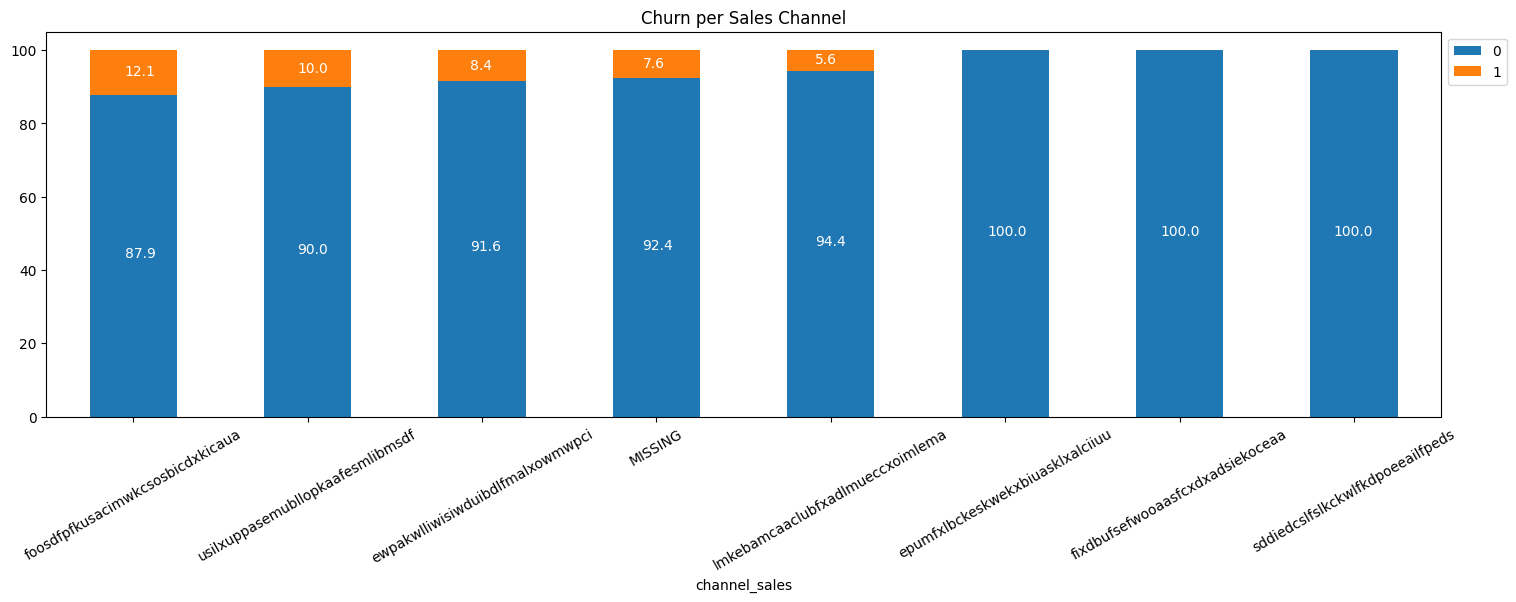

In [124]:
channel = client_df[["id", "channel_sales", "churn"]]
channel = channel.groupby([channel['channel_sales'], channel['churn']])["id"].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax = channel_churn.plot(kind="bar", stacked=True, figsize=(18,5))
plt.title("Churn per Sales Channel")
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
annotate_stacked_bars(ax, textsize=10)

# **Consumption**

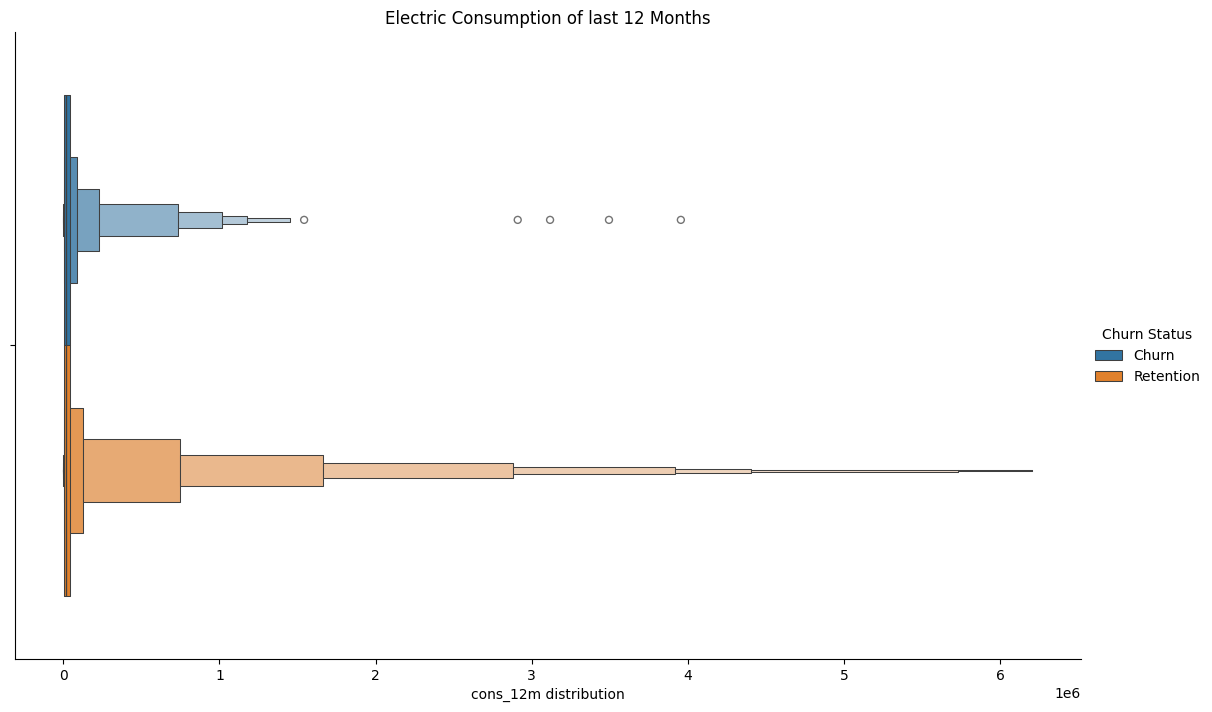

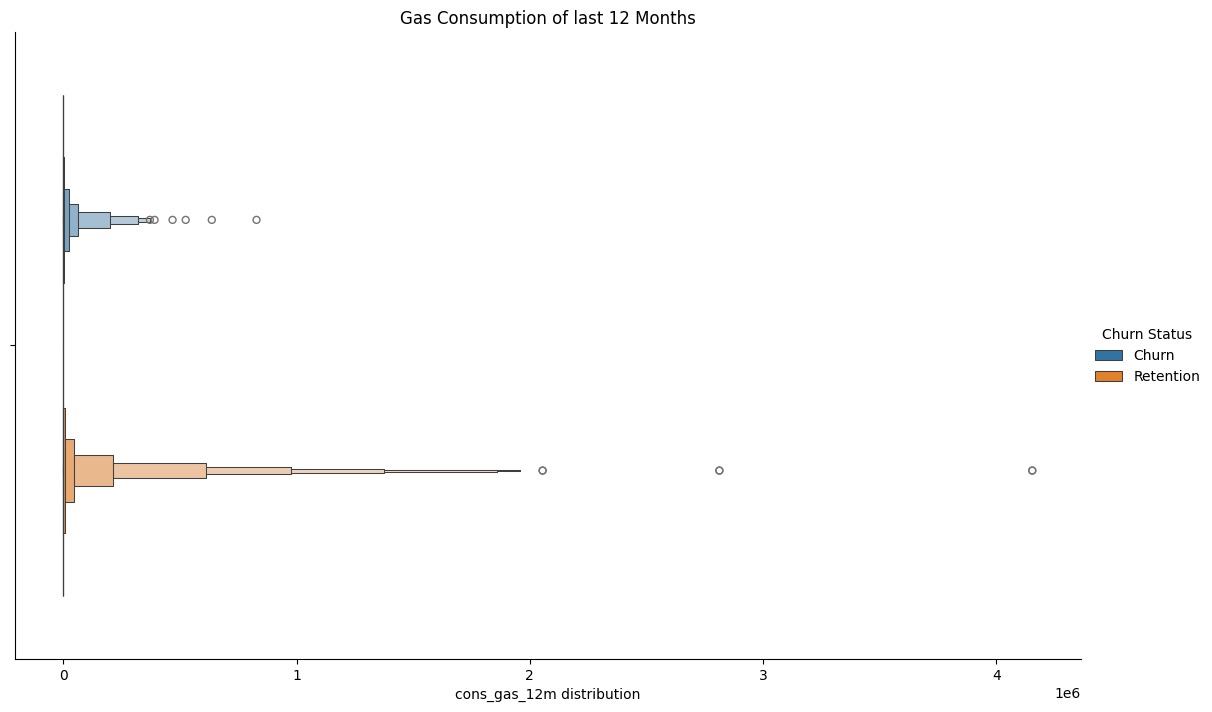

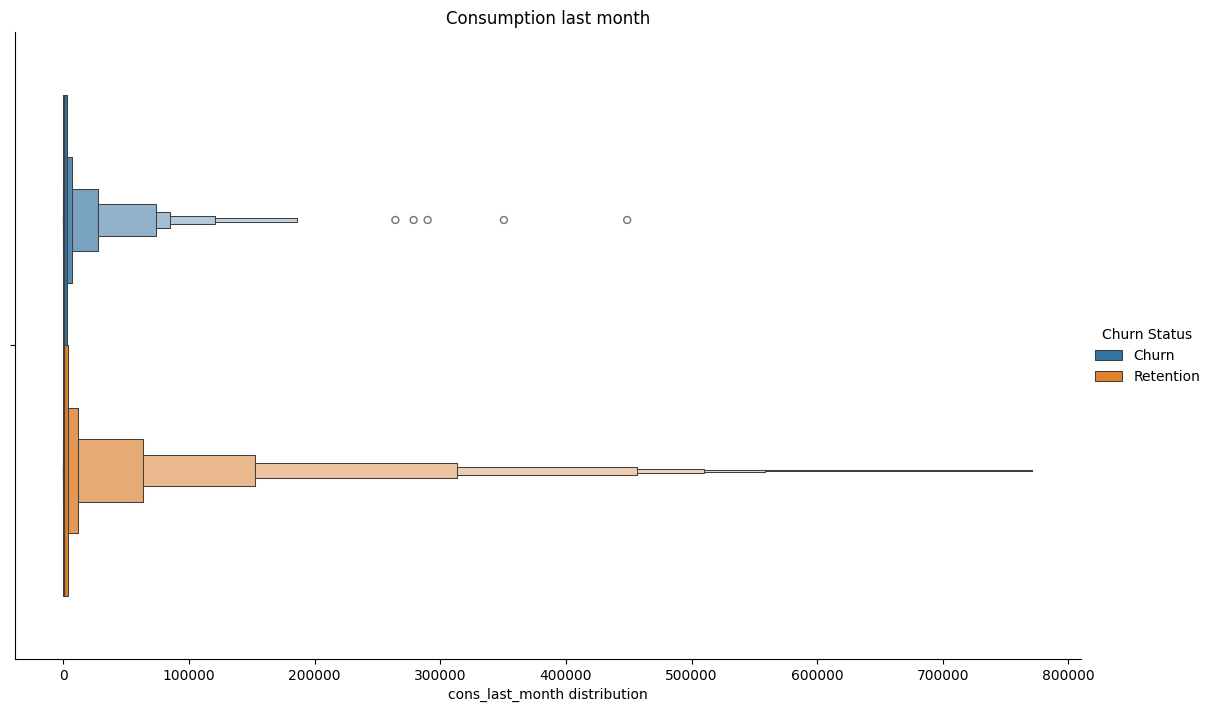

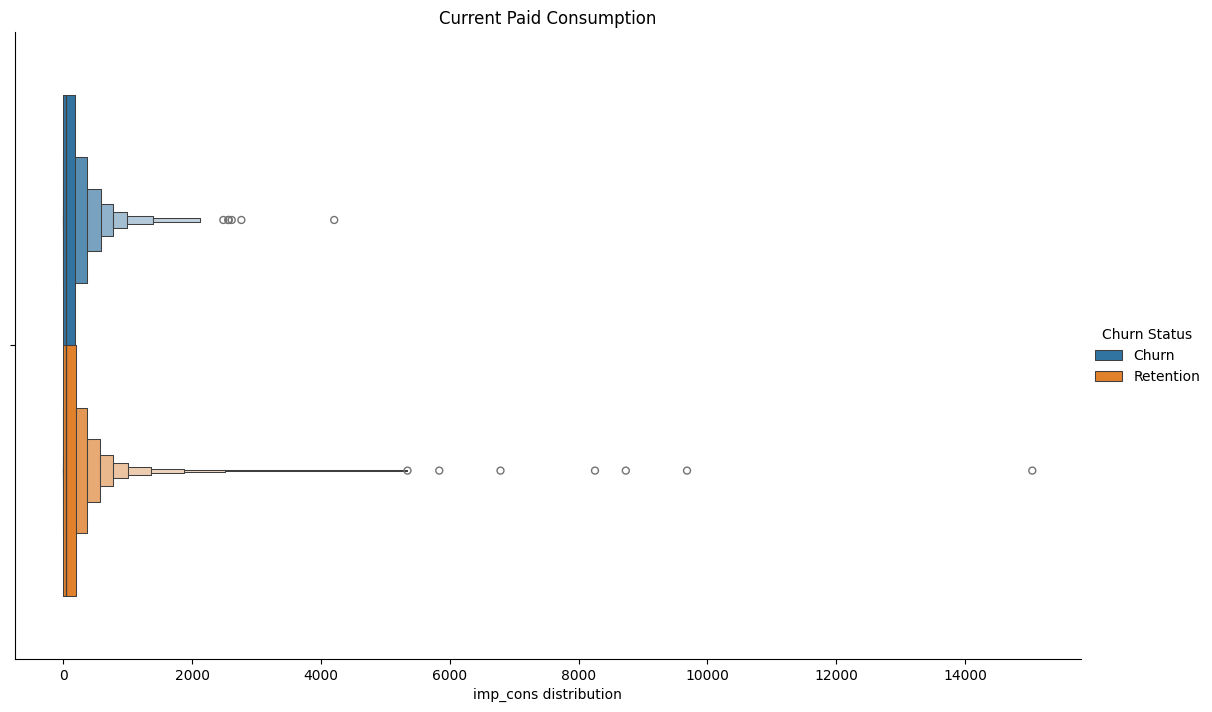

In [152]:
def plot_distribution(column_name, title):

  fig = sns.catplot(data=client_df, x=column_name,
                    hue="Churn Status", kind="boxen",
                    height=7, aspect=11/7)
  plt.title(title)
  plt.xlabel(f"{column_name} distribution")


consumption = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons']
consumption_name = ["Electric Consumption of last 12 Months",
                    "Gas Consumption of last 12 Months",
                    "Consumption last month",
                    "Current Paid Consumption"]

for cons, name in zip(consumption, consumption_name):
  plot_distribution(cons, name)

# **Forecast**

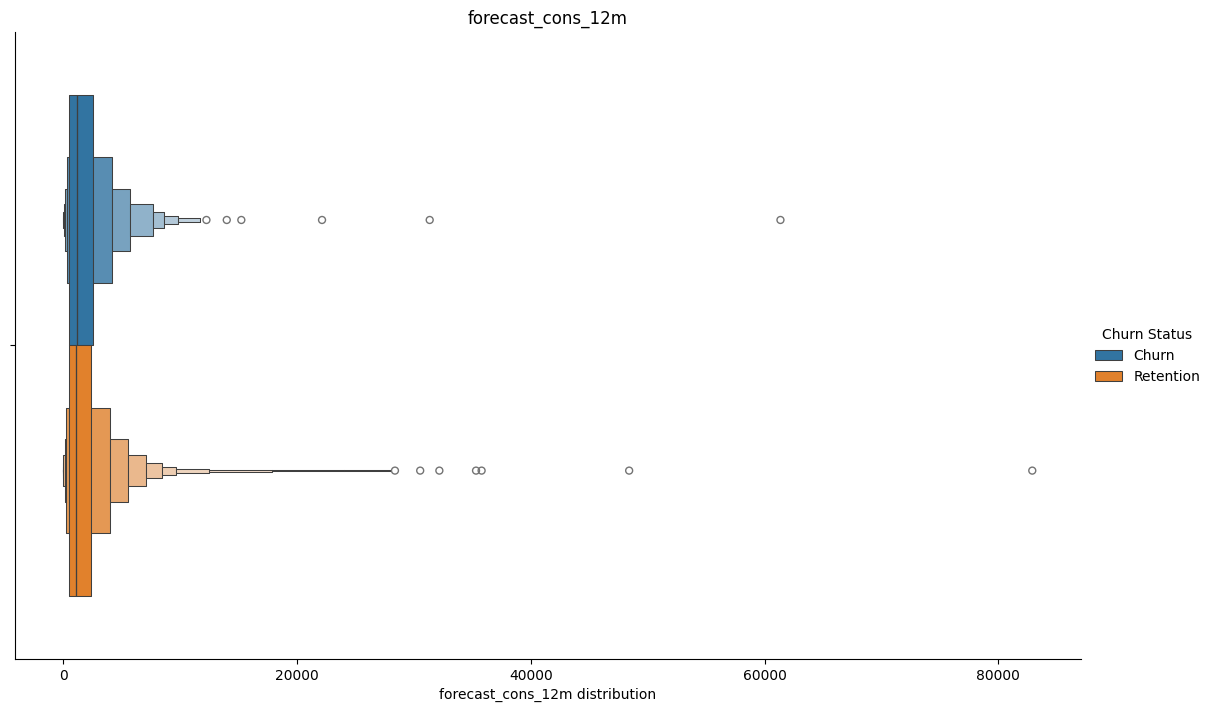

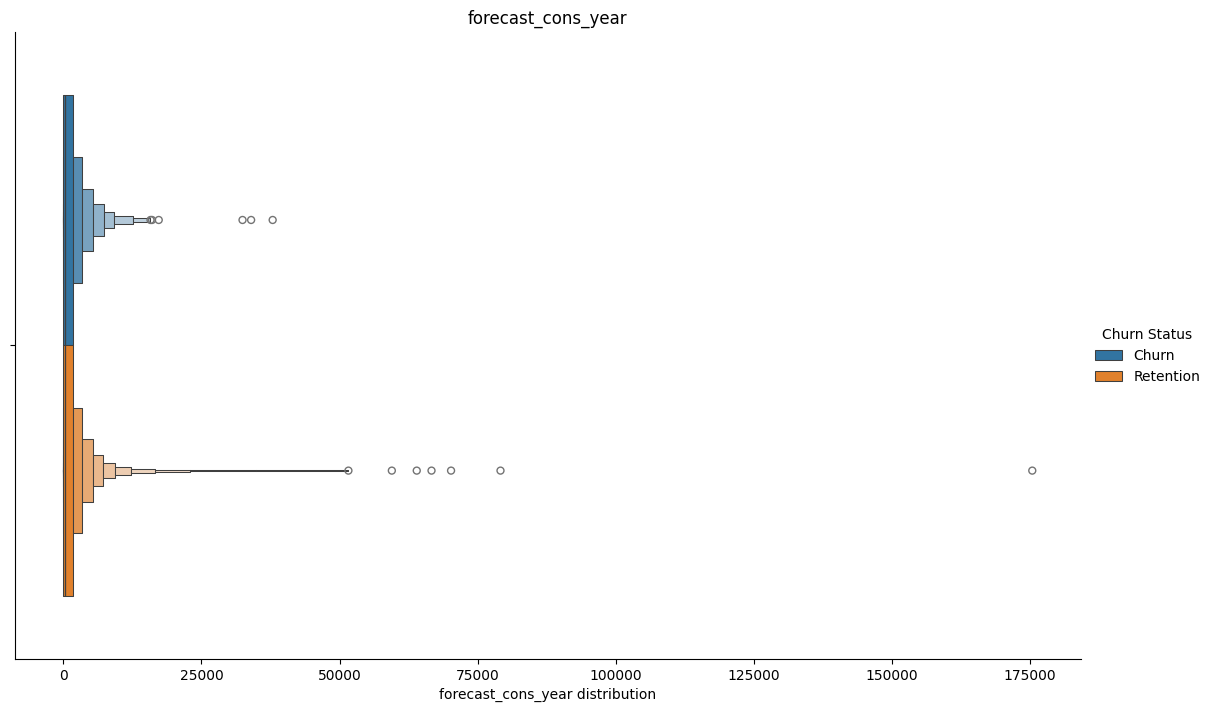

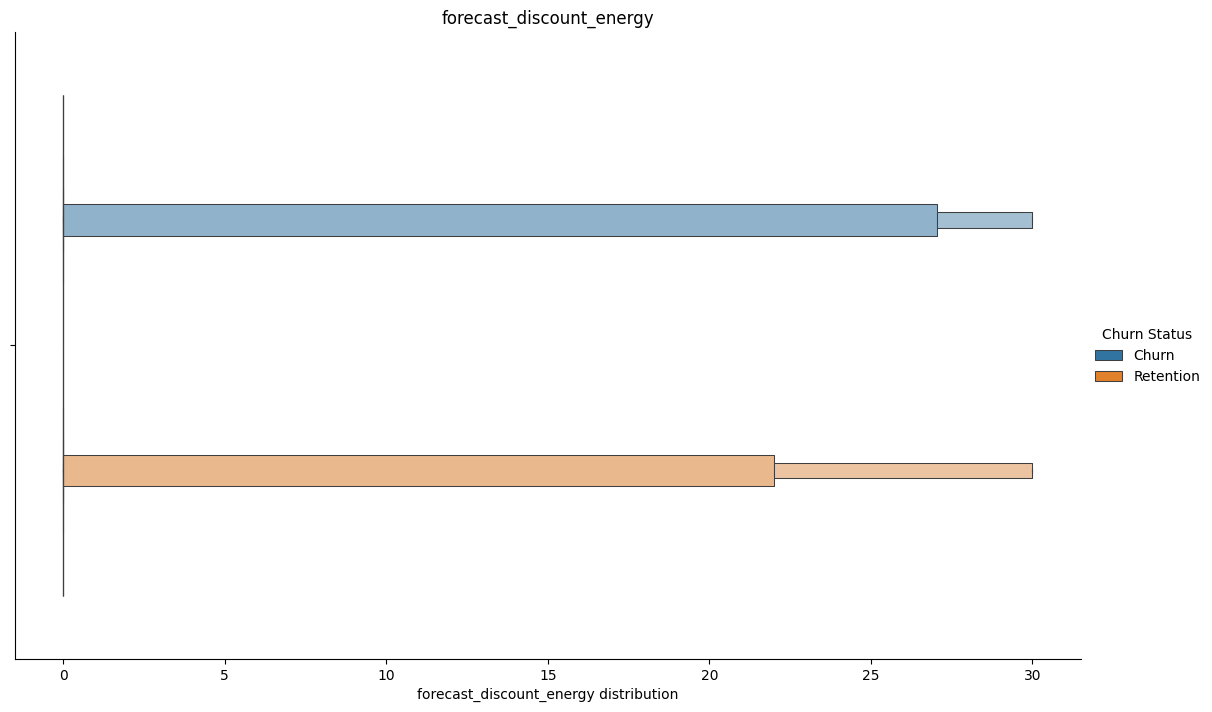

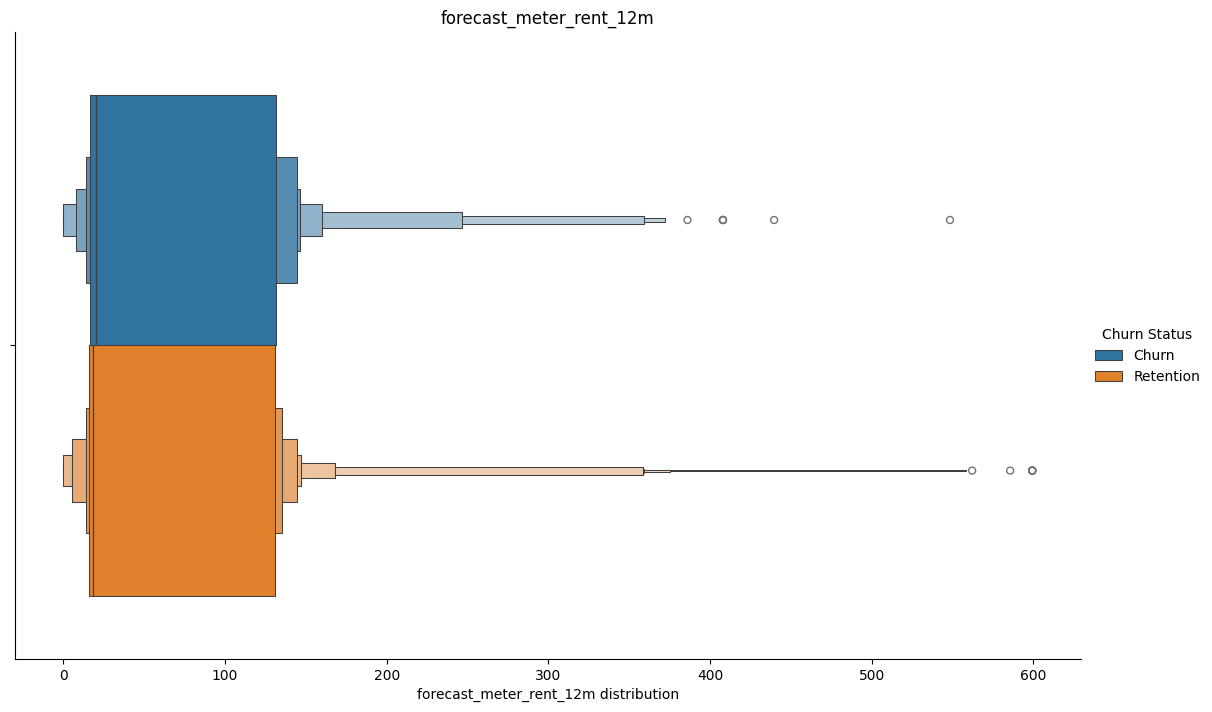

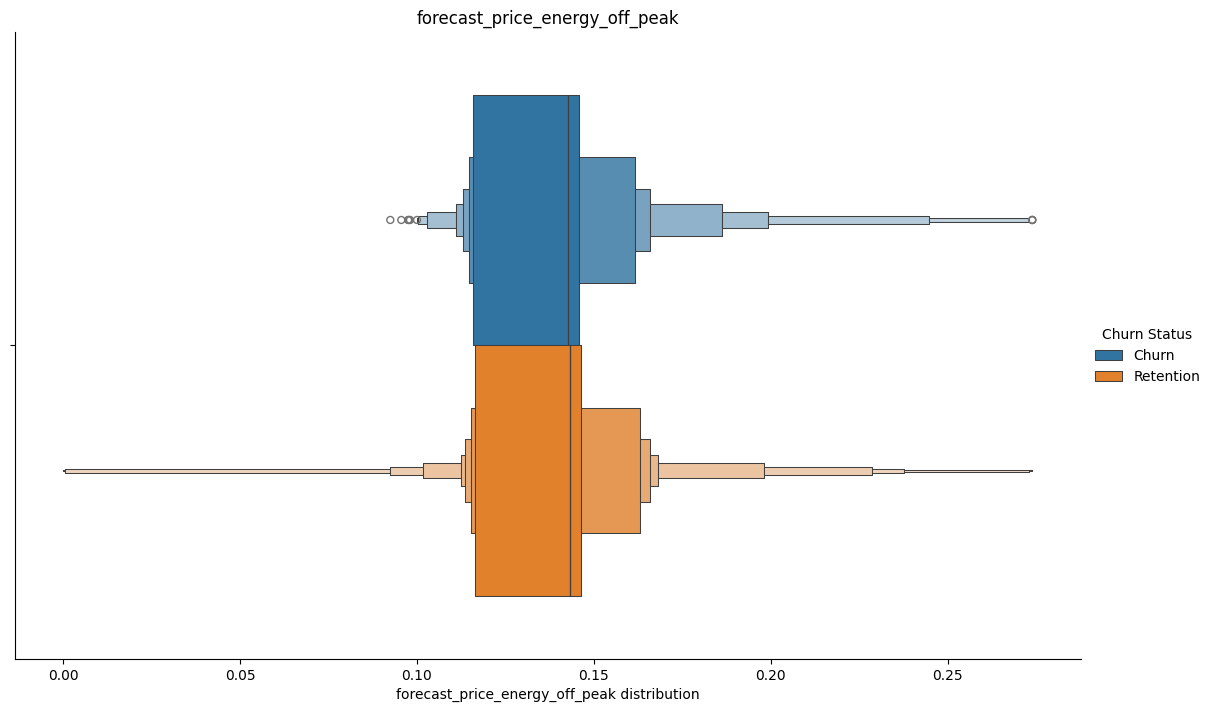

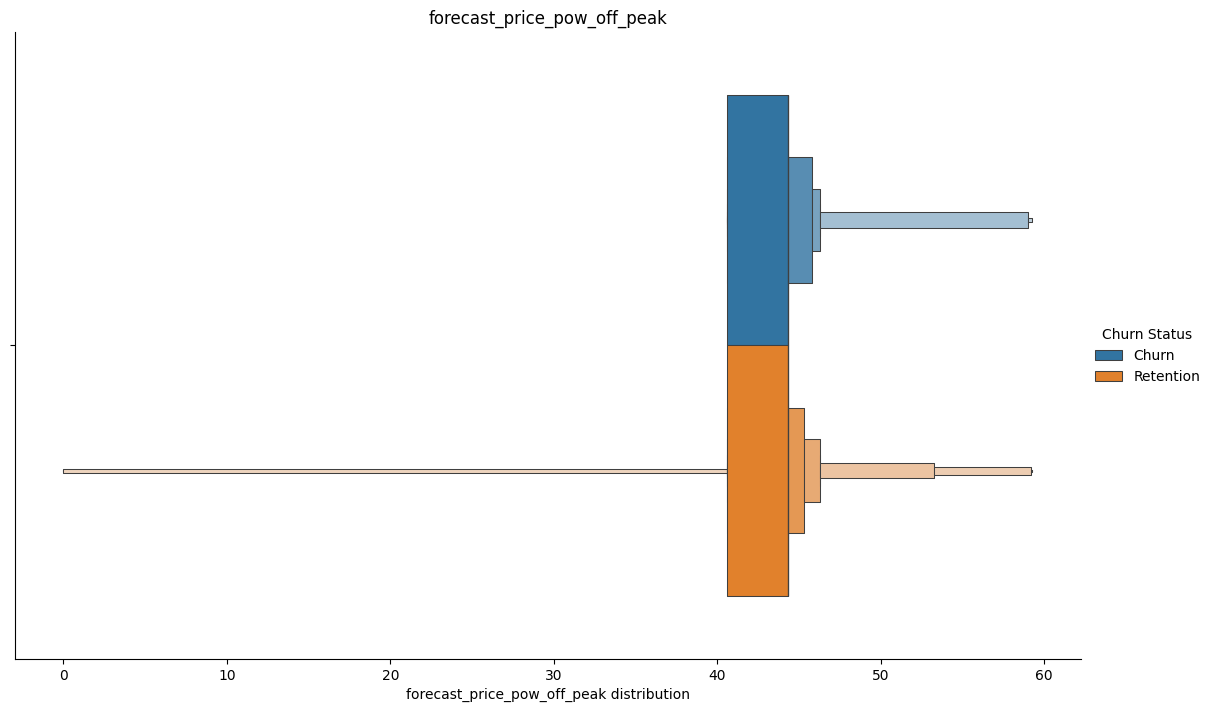

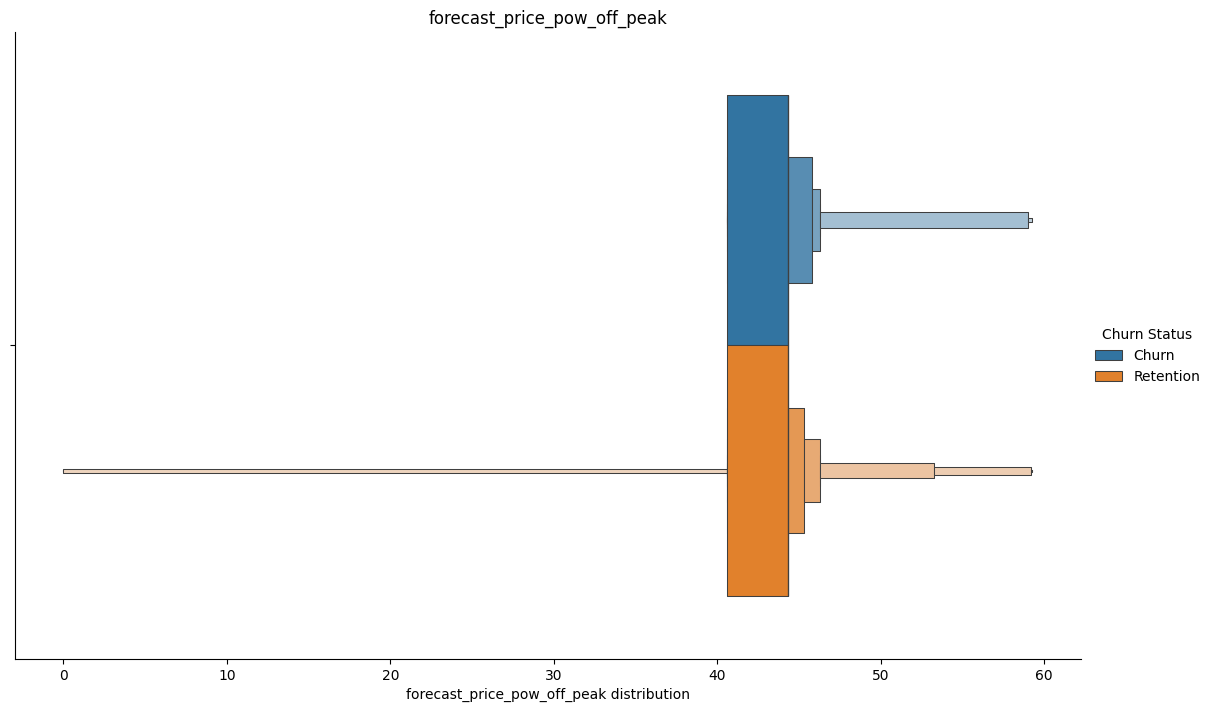

In [194]:

forecast_consumption = ['forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
                        'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_pow_off_peak',
                        'forecast_price_pow_off_peak']
# forecast_consumption_name = ["Electric Consumption of last 12 Months",
#                               "Gas Consumption of last 12 Months",
#                               "Consumption last month",
#                               "Current Paid Consumption"]

for cons, name in zip(forecast_consumption, forecast_consumption):
  plot_distribution(cons, name)

# **Margin**

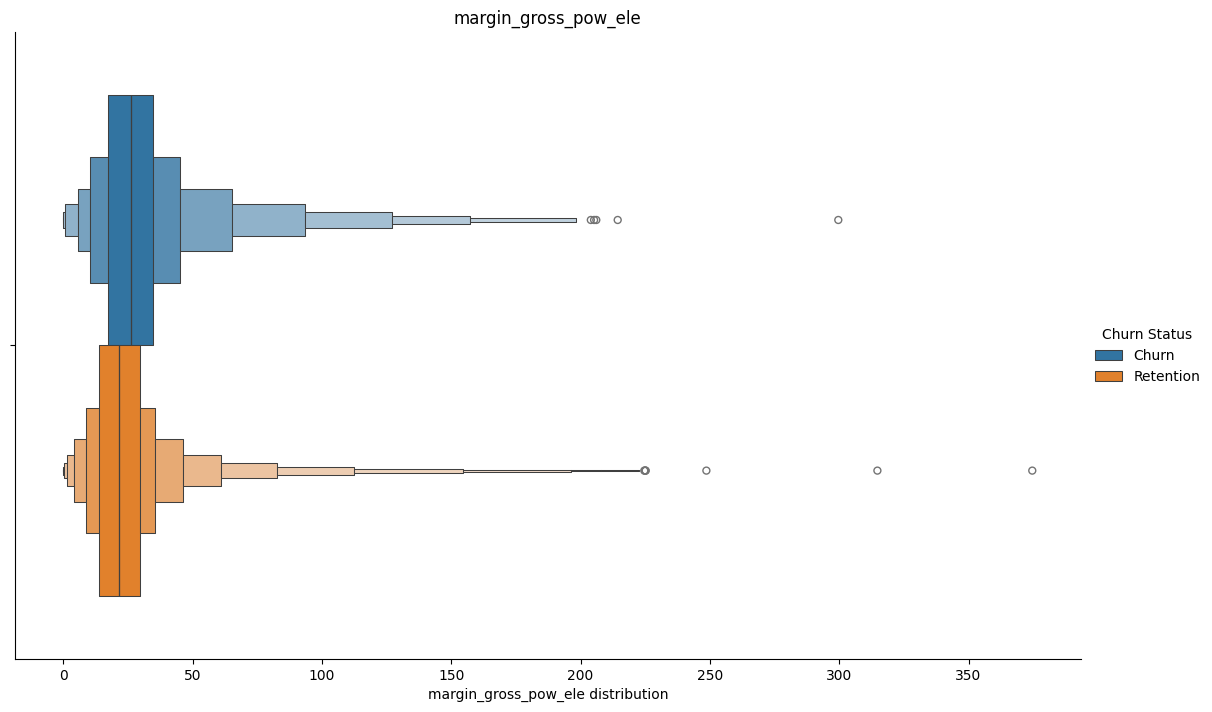

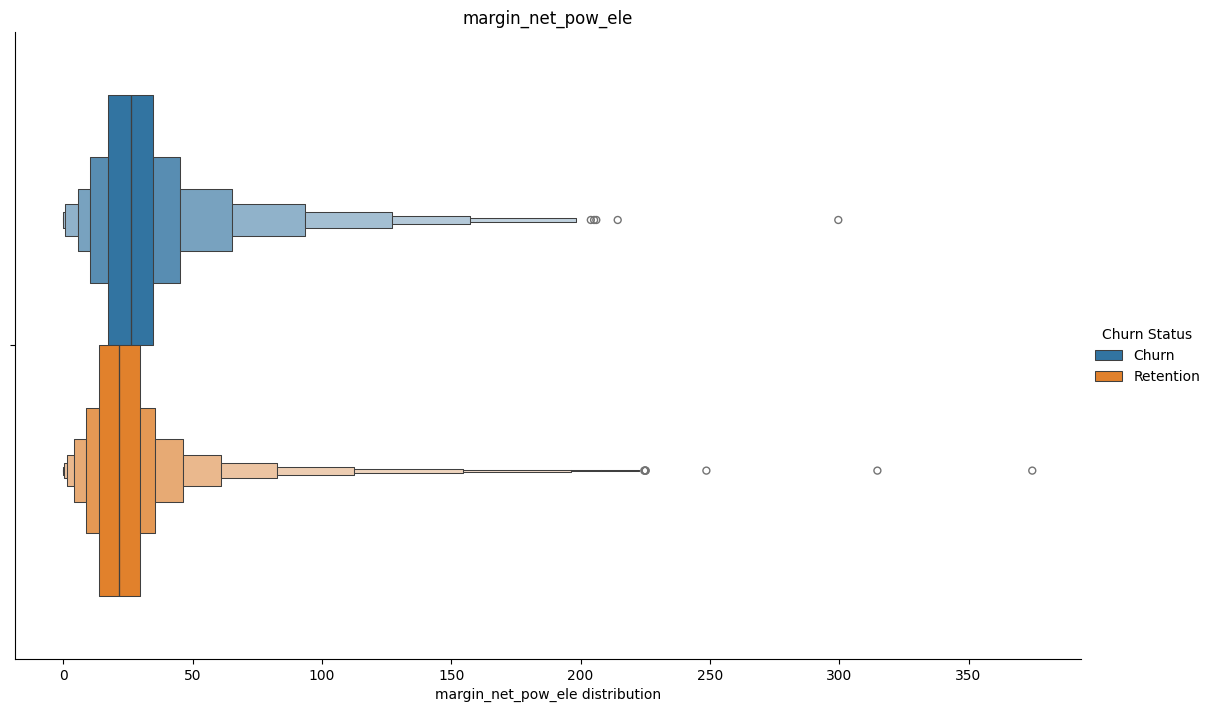

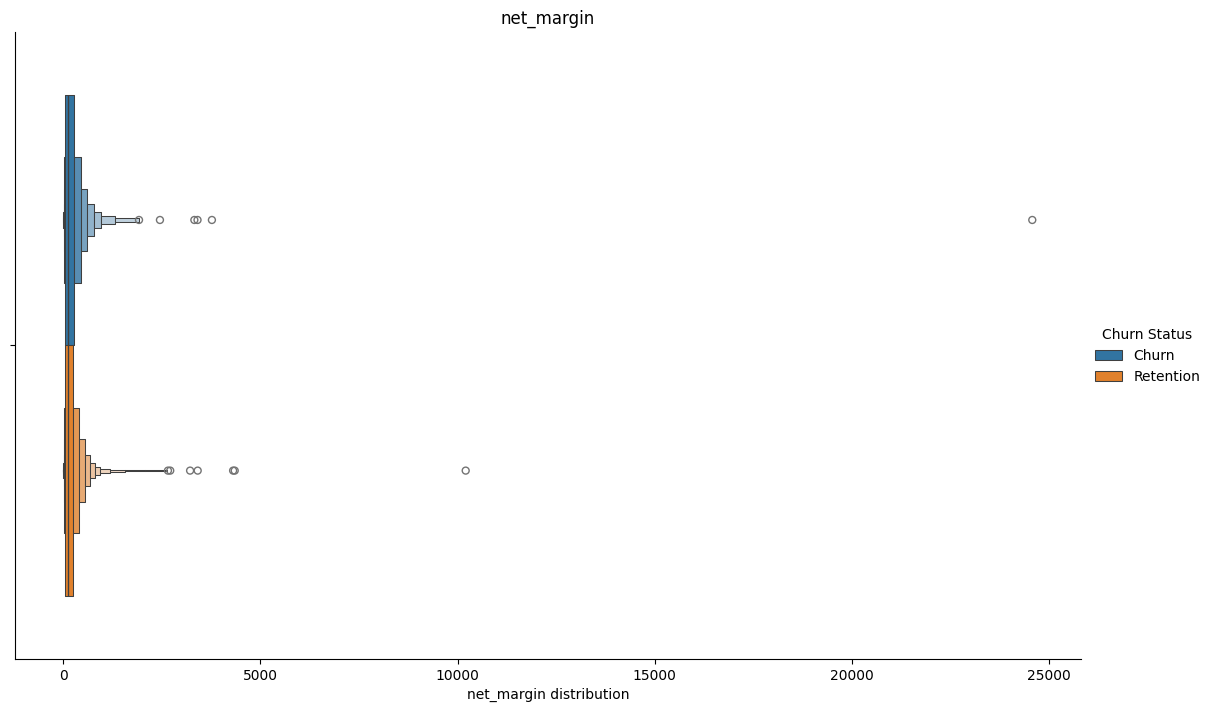

In [195]:
margin = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']

for cons, name in zip(margin, margin):
  plot_distribution(cons, name)

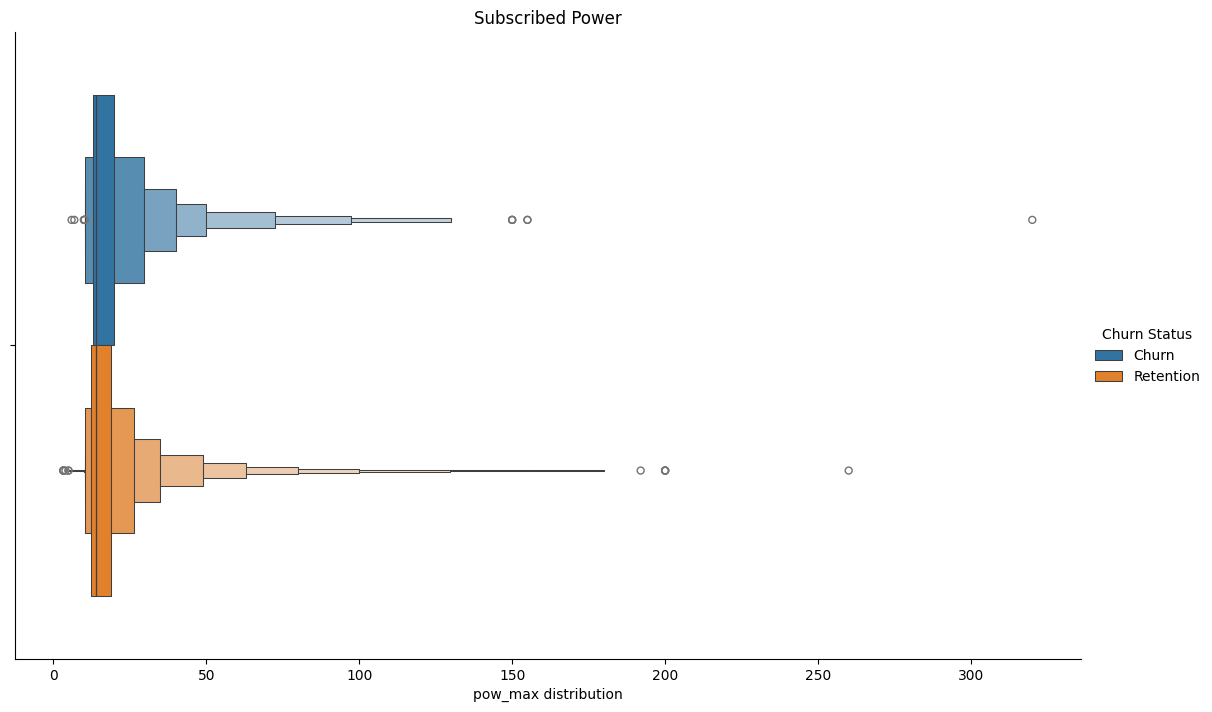

In [196]:
plot_distribution("pow_max", "Subscribed Power")

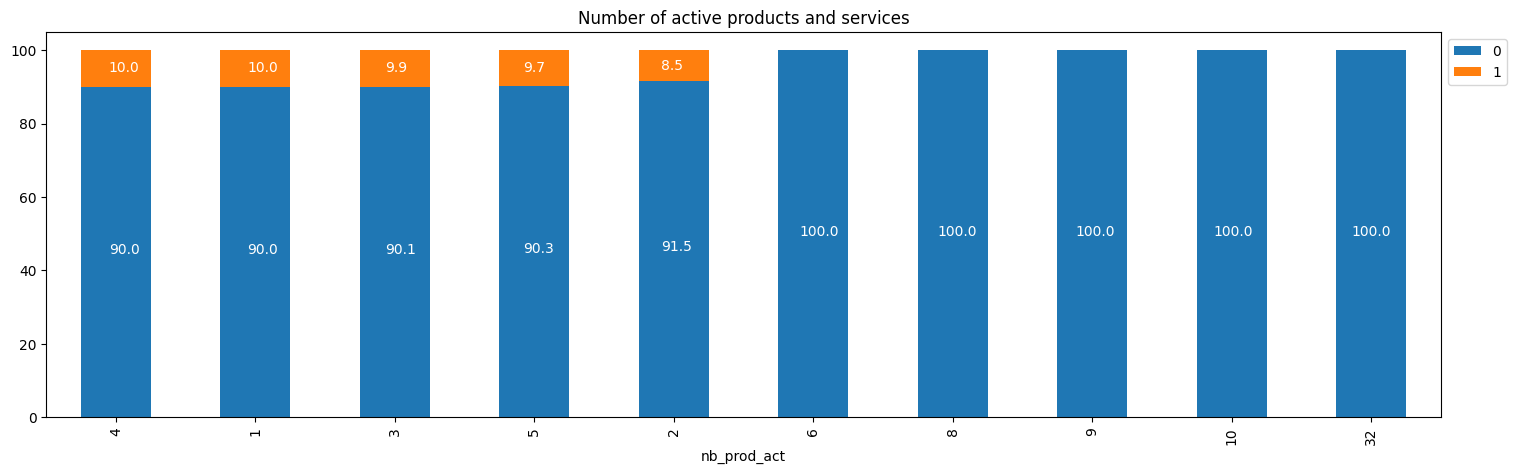

In [201]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

others = others.groupby([others['nb_prod_act'], others['churn']])["id"].count().unstack(level=1).fillna(0)
others_churn = (others.div(others.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax = others_churn.plot(kind="bar", stacked=True, figsize=(18,5))
plt.title("Number of active products and services")
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(rotation=30)
annotate_stacked_bars(ax, textsize=10)

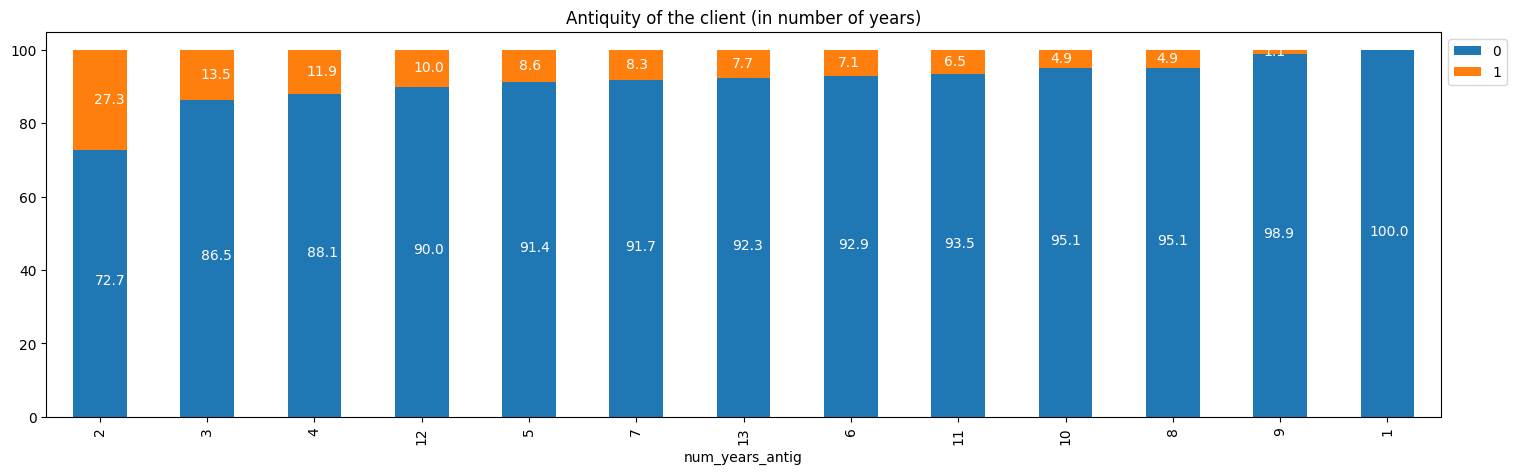

In [200]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

others = others.groupby([others['num_years_antig'], others['churn']])["id"].count().unstack(level=1).fillna(0)
others_churn = (others.div(others.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax = others_churn.plot(kind="bar", stacked=True, figsize=(18,5))
plt.title("Antiquity of the client (in number of years)")
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(rotation=30)
annotate_stacked_bars(ax, textsize=10)

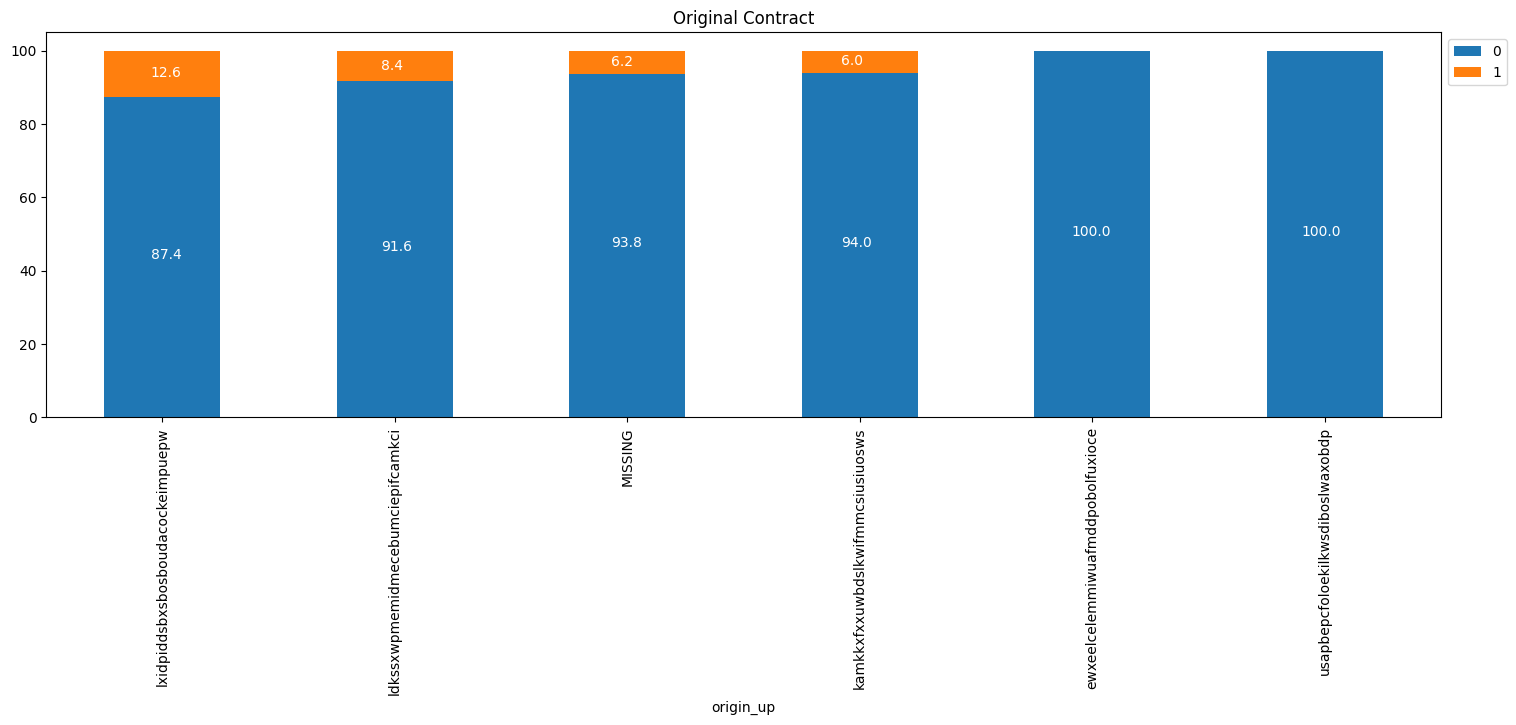

In [202]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

others = others.groupby([others['origin_up'], others['churn']])["id"].count().unstack(level=1).fillna(0)
others_churn = (others.div(others.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
ax = others_churn.plot(kind="bar", stacked=True, figsize=(18,5))
plt.title("Original Contract")
plt.legend(bbox_to_anchor=(1, 1))
# plt.xticks(rotation=30)
annotate_stacked_bars(ax, textsize=10)